In [1]:
import scanpy as sc
import os

In [2]:
adata = sc.read("../../../../data/pancreas_multiome_2022_processed.h5ad")

In [3]:
del adata.uns
del adata.obsp

In [4]:
adata.obs["celltype"].cat.categories

Index(['Alpha', 'Beta', 'Delta', 'Ductal', 'Eps. progenitors', 'Epsilon',
       'Fev+', 'Fev+ Alpha', 'Fev+ Beta', 'Fev+ Delta', 'Imm. Acinar',
       'Mat. Acinar', 'Ngn3 high', 'Ngn3 high cycling', 'Ngn3 low',
       'Prlf. Ductal'],
      dtype='object')

In [5]:
adata_endocrine = adata[~adata.obs["celltype"].isin(["Mat. Acinar", "Imm. Acinar", "Ductal", "Prlf. Ductal"])]

In [6]:
adata_end_gex = adata_endocrine[: ,adata_endocrine.var["modality"]=="GEX"]

In [7]:
adata_end_gex.shape

(9365, 14663)

In [8]:
adata_end_gex.X[0,:].data

array([ 1.,  2.,  8., ...,  1., 10.,  5.], dtype=float32)

In [9]:
sc.pp.log1p(adata_end_gex)
sc.pp.pca(adata_end_gex)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.neighbors(adata_end_gex)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/d

In [11]:
sc.tl.umap(adata_end_gex)

In [12]:
adata_end_gex.shape

(9365, 14663)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


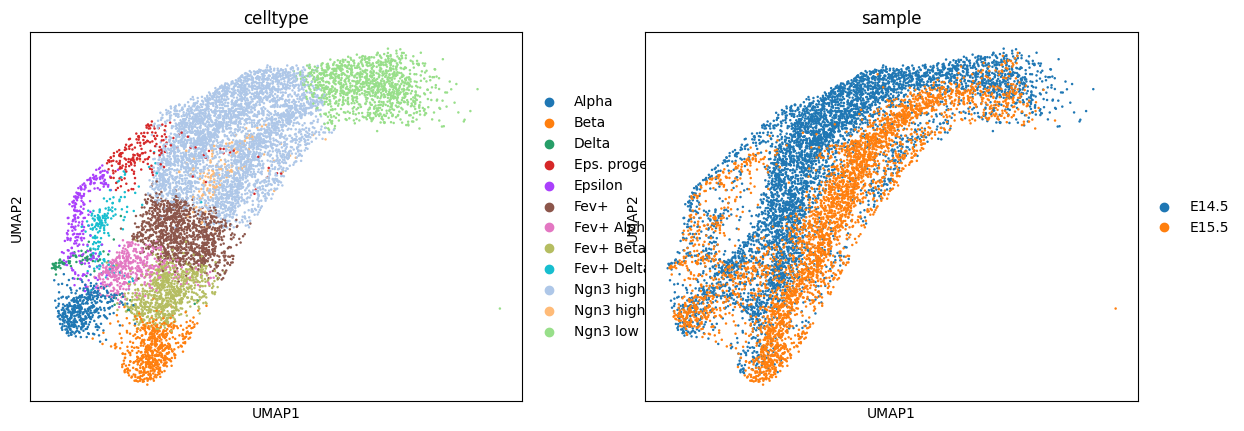

In [13]:
sc.pl.umap(adata_end_gex, color=["celltype", "sample"])

In [ ]:
adata_end_gex.write("../../../../data/adata_pancreas_2022_processed_new.h5ad")